In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
data = pandas.read_csv('clean_patents_batteries.tsv', sep='\t', low_memory=False)
data = pandas.DataFrame(data)

In [3]:
print(data.columns)

Index(['Unnamed: 0', 'Publication Number', 'Title - DWPI',
       'Publication Country Code', 'Publication Kind Code', 'Inventor First',
       'Inventor Count', 'Assignee/Applicant First', 'Assignee Count',
       'Ultimate Parent', 'Publication Date', 'Estimated Expiration Date',
       'Estimated Remaining Life', 'Dead/Alive',
       'Dead/Alive DWPI Family Status', 'Publication Year',
       'Count of Cited Refs - Patent', 'Count of Citing Patents',
       'Abstract - DWPI', 'Relevancy', 'Strategic Importance',
       'Probability of Grant', 'Domain Influence', 'Combined Patent Impact',
       'Inventor - DWPI', 'Assignee - DWPI', 'DWPI Class',
       'DWPI Family Members', 'DWPI Manual Codes', 'Title (English)',
       'Title Terms - DWPI', 'Abstract (English)', 'Abstract - DWPI Novelty',
       'Abstract - DWPI Detailed Description', 'Abstract - DWPI Activity',
       'Abstract - DWPI Mechanism', 'Abstract - DWPI Use',
       'Abstract - DWPI Advantage', 'Abstract - DWPI Tech Foc

In [4]:
print(set(data["Publication Country Code"]))  # CODICE PUBBLICAZIONE NAZIONE - solo un WO

{'WO'}


In [5]:
print(sorted(set(data["Publication Year"]))) # anni di pubblicazioni

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [6]:
# classi tecnologiche brevetti generali
val = data["DWPI Class"].value_counts()
print(val[0:10])  # 10 classi tecnologiche più usate nei brevetti in 14 anni

L03 C |  X16 E                      2302
A85 C |  L03 C |  X16 E             1203
L03 C |  X16 E |  X21 E              853
A85 C |  L03 C |  X16 E |  X21 E     377
U13 E |  W04 E                       318
T01 E                                298
X16 E                                210
W04 E                                184
T01 E |  U14 E                       169
X16 E |  X21 E                       147
Name: DWPI Class, dtype: int64


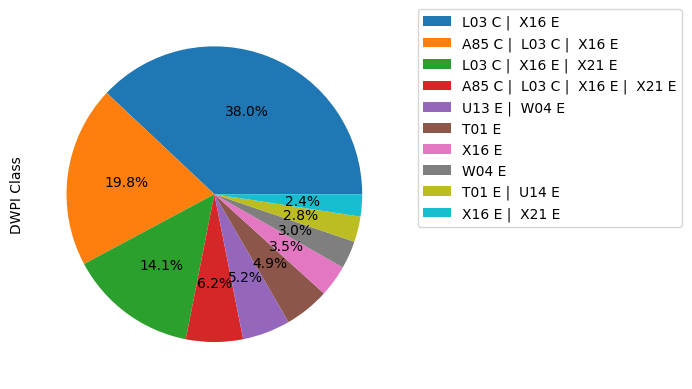

In [7]:
val[0:10].plot(kind="pie", subplots=True, legend=True, autopct='%.1f%%', labeldistance=None )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Publication Year
2010     687
2011     993
2012    1245
2013    1483
2014    1449
2015    1399
2016    1275
2017    1288
2018    1392
2019    1536
2020    1572
2021    1814
2022    1966
Name: DWPI Class, dtype: int64


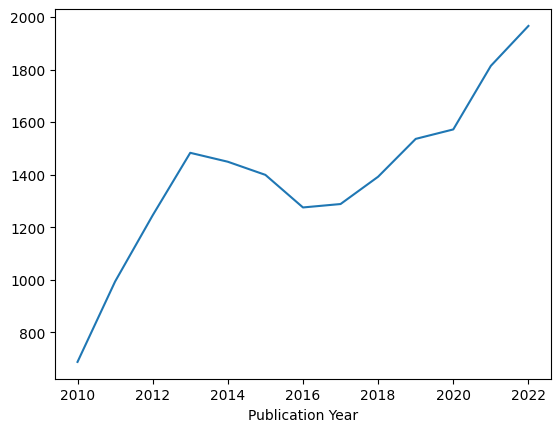

In [8]:
ragg_anno = data.groupby(data["Publication Year"])["DWPI Class"].count()
ragg_anno = ragg_anno.drop(2023, errors='ignore')  #eliminato anno 2023 date le poche osservazioni
print(ragg_anno)  # totali anno per anno
ragg_anno.plot()
plt.show()

In [9]:
conteggio_per_anno = data.groupby(["Publication Year", "DWPI Class"])["DWPI Class"].count()
top_10_per_anno = conteggio_per_anno.groupby("Publication Year").nlargest(10).reset_index(level=0, drop=True)
print(top_10_per_anno)

Publication Year  DWPI Class             
2010              L03 C |  X16 E             39
                  A85 C |  L03 C |  X16 E    36
                  L03 C |  X16 E |  X21 E    23
                  U13 E |  W04 E             18
                  L03 C |  X16 E |  X22 E    13
                                             ..
2023              E31 C |  L03 C |  X16 E     8
                  X16 E                       6
                  E34 C |  L03 C |  X16 E     4
                  E13 C |  L03 C |  X16 E     3
                  L03 C |  W01 E |  X16 E     3
Name: DWPI Class, Length: 140, dtype: int64


In [10]:
### ANNO 2020
anno = 2020
df = pd.DataFrame(top_10_per_anno)  # trasformazione in data frame

                                                   DWPI Class
Publication Year DWPI Class                                  
2020             L03 C |  X16 E                           235
                 A85 C |  L03 C |  X16 E                  115
                 L03 C |  X16 E |  X21 E                   58
                 A85 C |  L03 C |  X16 E |  X21 E          39
                 T01 E                                     32
                 W04 E                                     27
                 U13 E |  W04 E                            26
                 X16 E                                     22
                 E34 C |  L03 C |  X16 E                   14
                 E31 C |  L03 C |  X16 E                   13


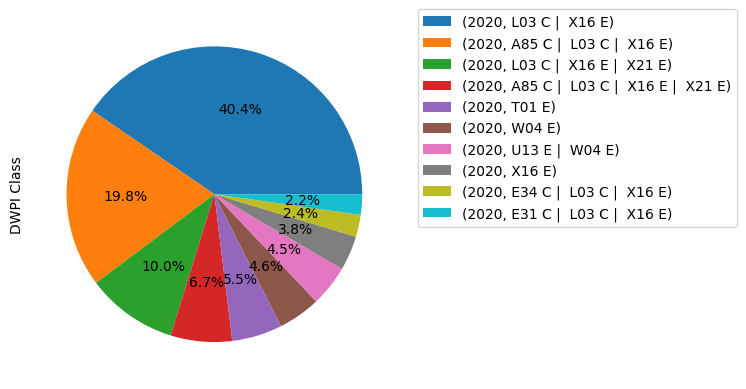

In [11]:
### PER ANNO 2020
print(df.loc[[anno]])  # solo i migliori 10 in un anno
df.loc[[anno]].plot(kind="pie", subplots=True, legend=True, autopct='%.1f%%', labeldistance=None )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

                                                   DWPI Class
Publication Year DWPI Class                                  
2010             L03 C |  X16 E                            39
                 A85 C |  L03 C |  X16 E                   36
                 L03 C |  X16 E |  X21 E                   23
                 U13 E |  W04 E                            18
                 L03 C |  X16 E |  X22 E                   13
                 T01 E                                     13
                 U12 E |  U13 E |  W04 E                   12
                 A85 C |  L03 C |  X16 E |  X22 E          11
                 X16 E |  X21 E                            10
                 A85 C |  L03 C |  X16 E |  X21 E           9


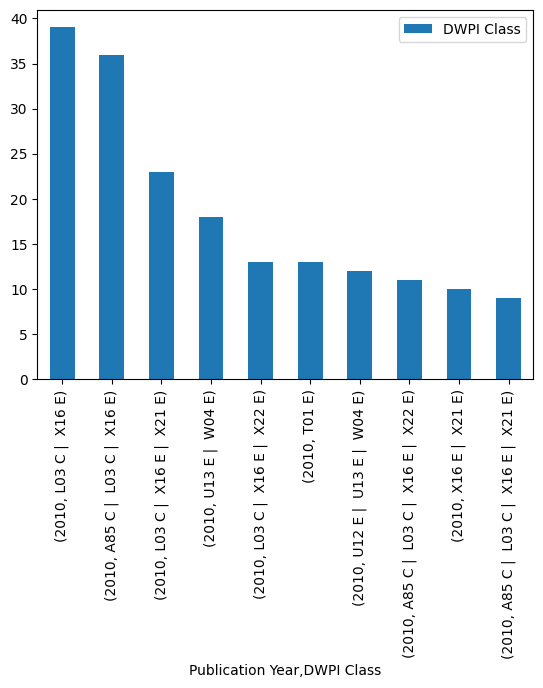

                                                   DWPI Class
Publication Year DWPI Class                                  
2011             L03 C |  X16 E                            88
                 L03 C |  X16 E |  X21 E                   41
                 A85 C |  L03 C |  X16 E                   39
                 X26 E |  Q71 N                            20
                 L03 C |  X16 E |  X22 E                   15
                 U11 E |  U13 E |  W04 E                   15
                 U12 E |  U13 E |  W04 E                   13
                 U13 E |  W04 E                            13
                 X16 E                                     12
                 A85 C |  L03 C |  X16 E |  X21 E          11


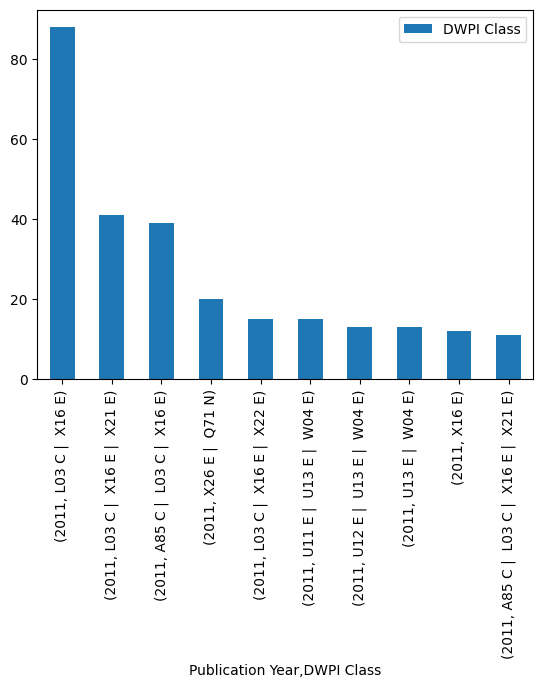

                                                   DWPI Class
Publication Year DWPI Class                                  
2012             L03 C |  X16 E                           112
                 L03 C |  X16 E |  X21 E                   61
                 A85 C |  L03 C |  X16 E                   60
                 L03 C |  T01 E |  W01 E |  X16 E          25
                 L03 C |  X16 E |  X22 E                   25
                 L03 C |  V01 E |  X16 E                   21
                 A85 C |  L03 C |  X16 E |  X21 E          18
                 T01 E                                     17
                 U13 E |  W04 E                            17
                 L03 C |  X16 E |  X21 E |  X22 E          16


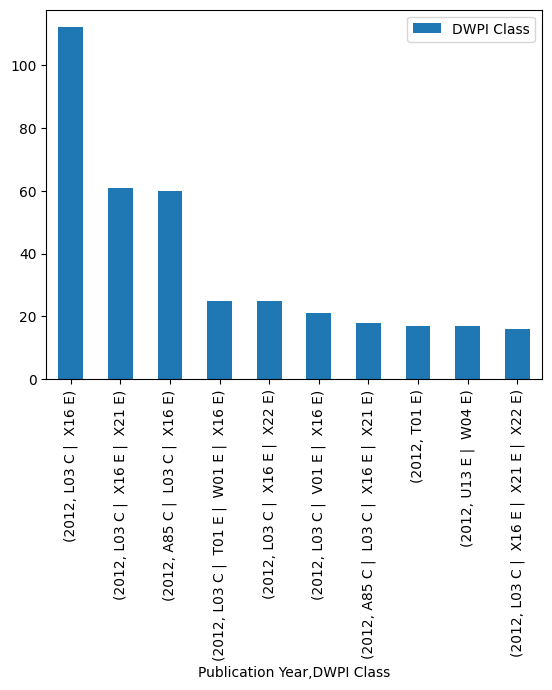

                                                   DWPI Class
Publication Year DWPI Class                                  
2013             L03 C |  X16 E                           125
                 L03 C |  X16 E |  X21 E                  100
                 A85 C |  L03 C |  X16 E                   54
                 L03 C |  X16 E |  X22 E                   33
                 L03 C |  T01 E |  W01 E |  X16 E          28
                 A85 C |  L03 C |  X16 E |  X21 E          23
                 L03 C |  X16 E |  X21 E |  X22 E          20
                 U13 E |  W04 E                            18
                 T01 E |  U14 E                            17
                 A85 C |  L03 C |  X16 E |  X22 E          15


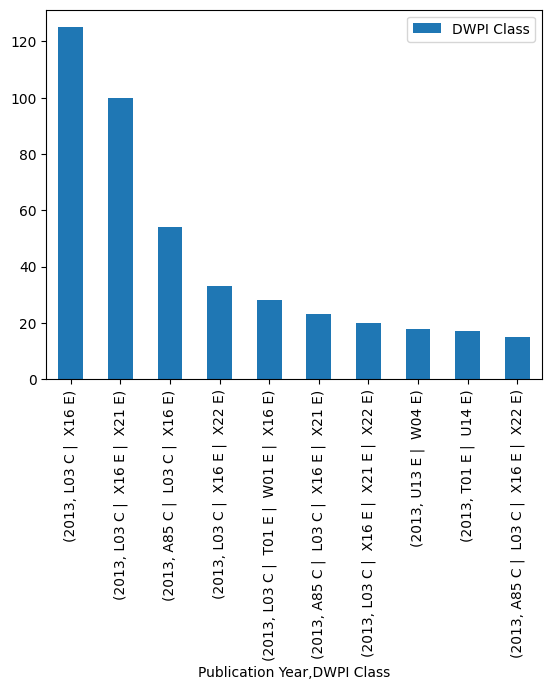

                                                   DWPI Class
Publication Year DWPI Class                                  
2014             L03 C |  X16 E                           146
                 L03 C |  X16 E |  X21 E                   80
                 A85 C |  L03 C |  X16 E                   76
                 T01 E                                     26
                 L03 C |  X16 E |  X22 E                   23
                 A85 C |  L03 C |  X16 E |  X21 E          22
                 L03 C |  X16 E |  X21 E |  X22 E          20
                 T01 E |  U14 E                            19
                 U13 E |  W04 E                            19
                 X26 E |  Q71 N                            19


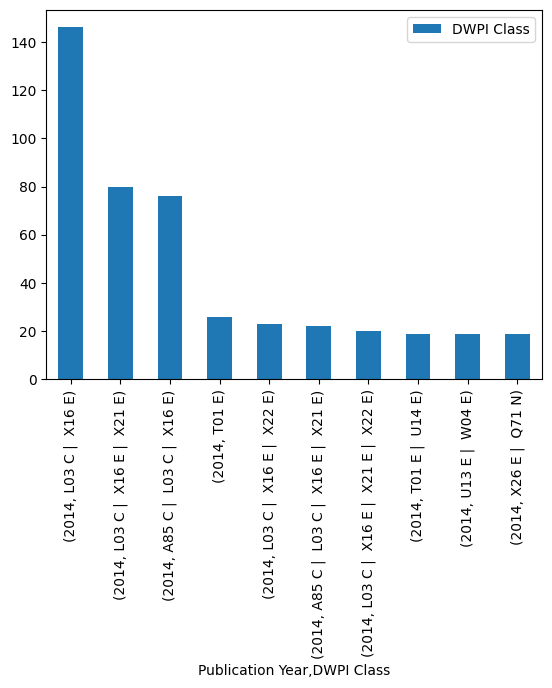

                                                            DWPI Class
Publication Year DWPI Class                                           
2015             L03 C |  X16 E                                    156
                 A85 C |  L03 C |  X16 E                            83
                 L03 C |  X16 E |  X21 E                            76
                 A85 C |  L03 C |  X16 E |  X21 E                   32
                 L03 C |  X16 E |  X21 E |  X22 E                   19
                 T01 E                                              18
                 U13 E |  W04 E                                     18
                 L03 C |  X16 E |  X22 E                            15
                 T01 E |  U14 E                                     14
                 L03 C |  T01 E |  W01 E |  X16 E |  X21 E          12


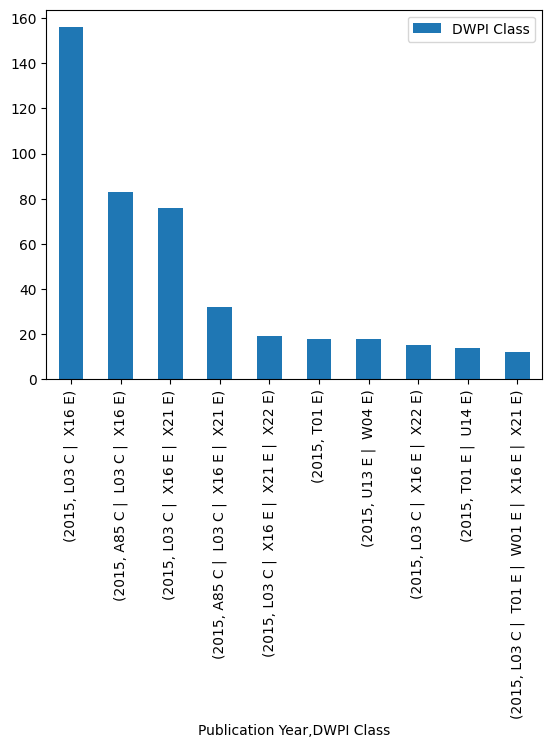

                                                   DWPI Class
Publication Year DWPI Class                                  
2016             L03 C |  X16 E                           135
                 A85 C |  L03 C |  X16 E                   76
                 L03 C |  X16 E |  X21 E                   50
                 A85 C |  L03 C |  X16 E |  X21 E          37
                 X16 E                                     24
                 T01 E                                     22
                 U12 E |  U13 E |  W04 E                   19
                 U13 E |  W04 E                            18
                 W04 E                                     16
                 X26 E |  Q71 N                            15


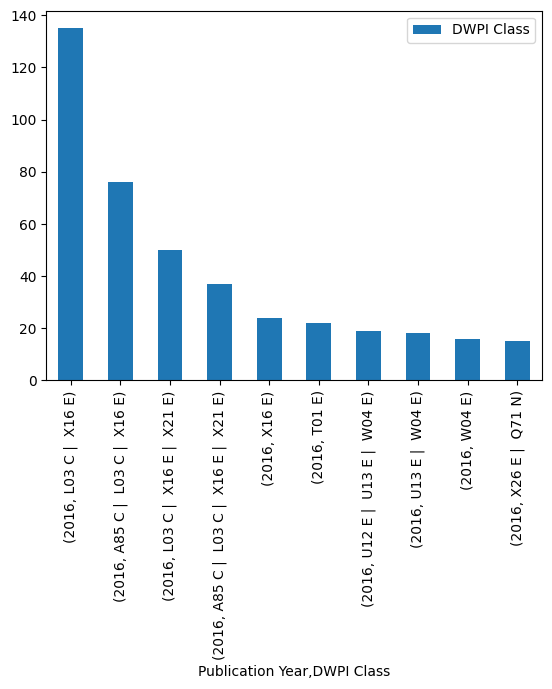

                                                   DWPI Class
Publication Year DWPI Class                                  
2017             L03 C |  X16 E                           162
                 A85 C |  L03 C |  X16 E                  105
                 L03 C |  X16 E |  X21 E                   59
                 U13 E |  W04 E                            43
                 A85 C |  L03 C |  X16 E |  X21 E          31
                 T01 E                                     25
                 T01 E |  U14 E                            17
                 W04 E                                     16
                 E34 C |  L03 C |  X16 E                   15
                 U11 E |  U13 E |  W04 E                   13


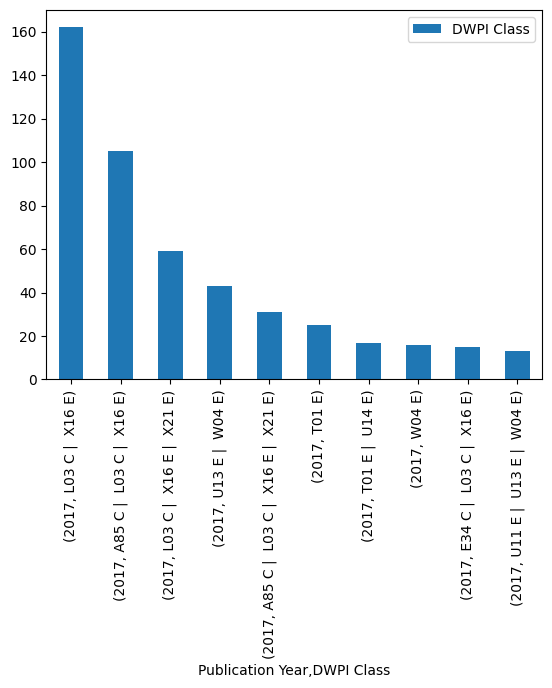

                                                   DWPI Class
Publication Year DWPI Class                                  
2018             L03 C |  X16 E                           198
                 A85 C |  L03 C |  X16 E                  100
                 L03 C |  X16 E |  X21 E                   70
                 U13 E |  W04 E                            35
                 X16 E                                     26
                 A85 C |  L03 C |  X16 E |  X21 E          24
                 T01 E                                     19
                 W04 E                                     19
                 E34 C |  L03 C |  X16 E                   14
                 T01 E |  U14 E                            11


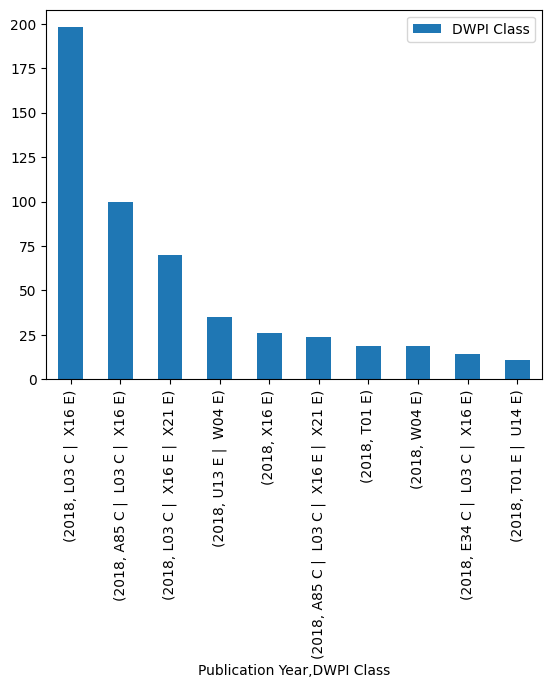

                                                   DWPI Class
Publication Year DWPI Class                                  
2019             L03 C |  X16 E                           207
                 A85 C |  L03 C |  X16 E                  122
                 L03 C |  X16 E |  X21 E                   72
                 U13 E |  W04 E                            41
                 A85 C |  L03 C |  X16 E |  X21 E          39
                 T01 E                                     34
                 L03 C |  T01 E |  X16 E                   20
                 X16 E                                     19
                 L03 C |  X12 E |  X16 E                   12
                 T01 E |  U14 E                            12


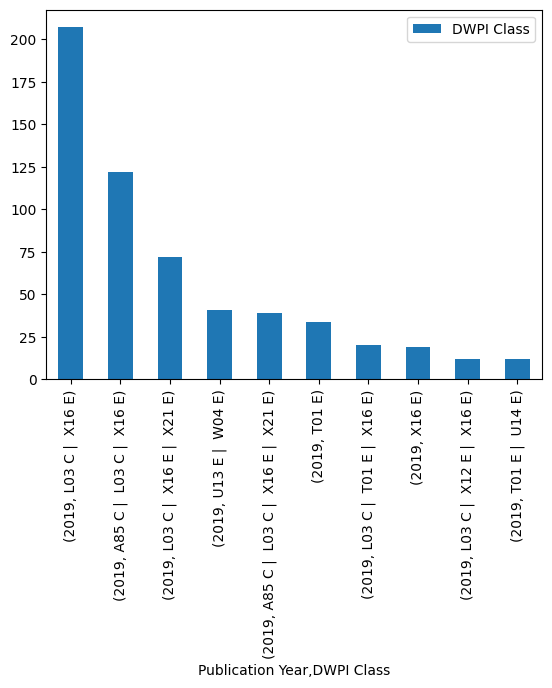

                                                   DWPI Class
Publication Year DWPI Class                                  
2020             L03 C |  X16 E                           235
                 A85 C |  L03 C |  X16 E                  115
                 L03 C |  X16 E |  X21 E                   58
                 A85 C |  L03 C |  X16 E |  X21 E          39
                 T01 E                                     32
                 W04 E                                     27
                 U13 E |  W04 E                            26
                 X16 E                                     22
                 E34 C |  L03 C |  X16 E                   14
                 E31 C |  L03 C |  X16 E                   13


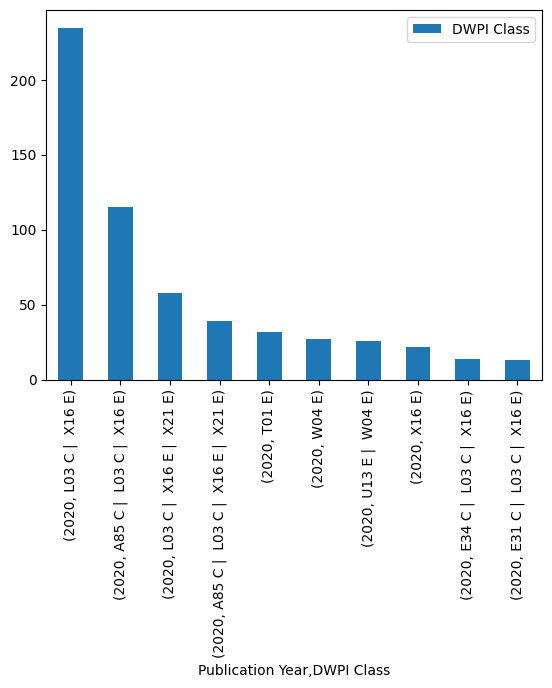

                                                   DWPI Class
Publication Year DWPI Class                                  
2021             L03 C |  X16 E                           311
                 A85 C |  L03 C |  X16 E                  148
                 L03 C |  X16 E |  X21 E                   66
                 A85 C |  L03 C |  X16 E |  X21 E          40
                 T01 E                                     33
                 U13 E |  W04 E                            27
                 L03 C |  X12 E |  X16 E                   21
                 W04 E                                     21
                 T01 E |  U14 E                            17
                 X16 E                                     16


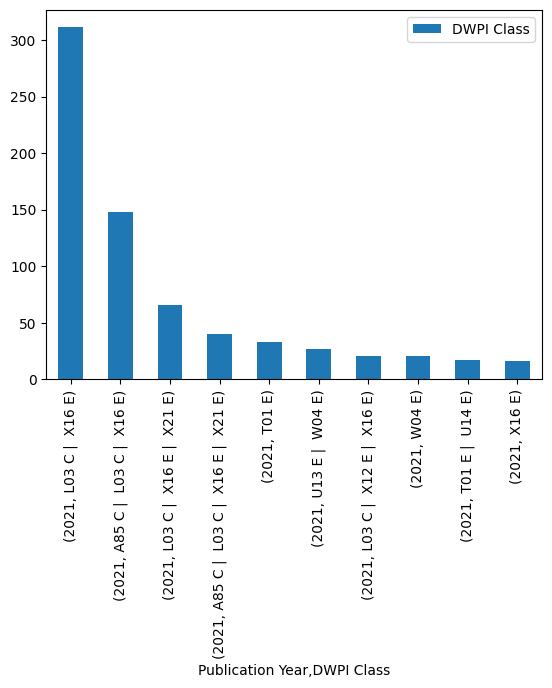

                                                   DWPI Class
Publication Year DWPI Class                                  
2022             L03 C |  X16 E                           326
                 A85 C |  L03 C |  X16 E                  154
                 L03 C |  X16 E |  X21 E                   77
                 A85 C |  L03 C |  X16 E |  X21 E          42
                 X16 E                                     36
                 E31 C |  L03 C |  X16 E                   27
                 T01 E                                     23
                 U13 E |  W04 E                            22
                 W04 E                                     22
                 X16 E |  X21 E                            20


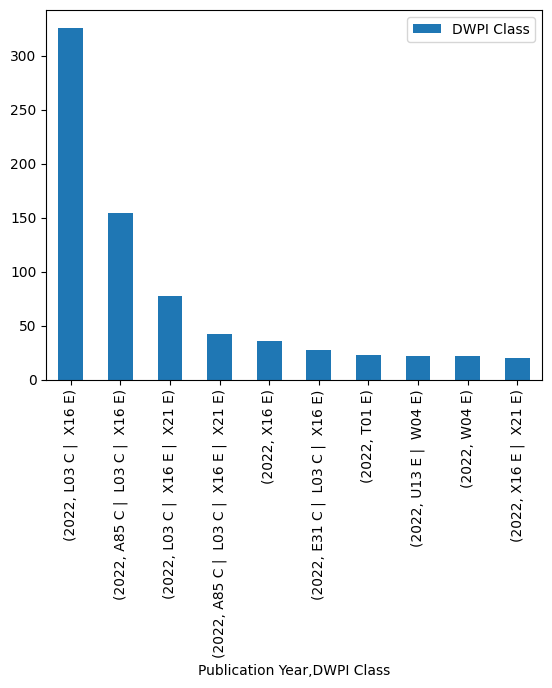

                                                   DWPI Class
Publication Year DWPI Class                                  
2023             L03 C |  X16 E                            62
                 A85 C |  L03 C |  X16 E                   35
                 L03 C |  X16 E |  X21 E                   20
                 T01 E                                     11
                 A85 C |  L03 C |  X16 E |  X21 E          10
                 E31 C |  L03 C |  X16 E                    8
                 X16 E                                      6
                 E34 C |  L03 C |  X16 E                    4
                 E13 C |  L03 C |  X16 E                    3
                 L03 C |  W01 E |  X16 E                    3


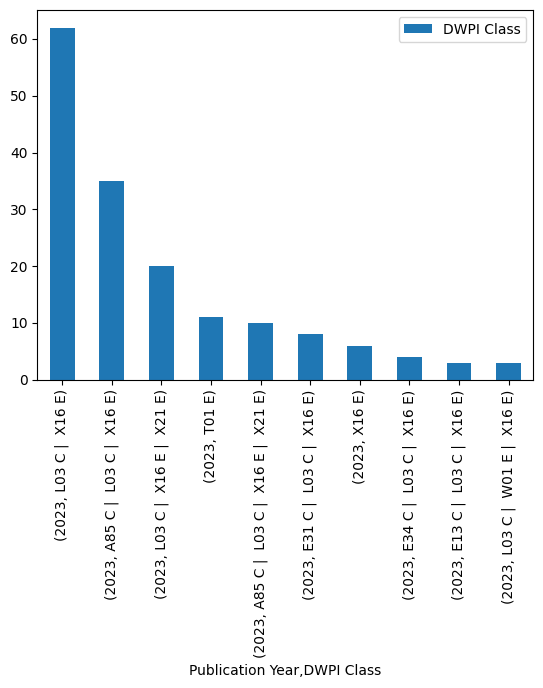

In [12]:
### GRAFICO A BARRE - CICLO FOR ANNUALE PER CLASSE TECNOLOGIA BREVETTI
for i in range(2010,2024):          #ciclo per produrre barchar e numero di brevetti suddivisi per tipologia effettuati anno per anno
    print(df.loc[[i]])
    df.loc[[i]].plot(kind="bar")
    plt.show()

                                                   DWPI Class
Publication Year DWPI Class                                  
2010             L03 C |  X16 E                            39
                 A85 C |  L03 C |  X16 E                   36
                 L03 C |  X16 E |  X21 E                   23
                 U13 E |  W04 E                            18
                 L03 C |  X16 E |  X22 E                   13
                 T01 E                                     13
                 U12 E |  U13 E |  W04 E                   12
                 A85 C |  L03 C |  X16 E |  X22 E          11
                 X16 E |  X21 E                            10
                 A85 C |  L03 C |  X16 E |  X21 E           9


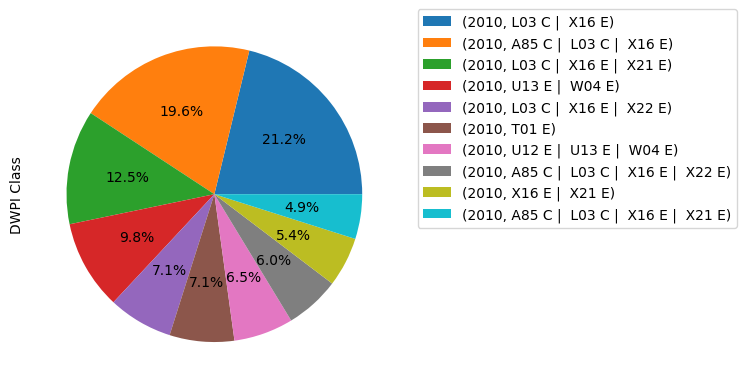

                                                   DWPI Class
Publication Year DWPI Class                                  
2011             L03 C |  X16 E                            88
                 L03 C |  X16 E |  X21 E                   41
                 A85 C |  L03 C |  X16 E                   39
                 X26 E |  Q71 N                            20
                 L03 C |  X16 E |  X22 E                   15
                 U11 E |  U13 E |  W04 E                   15
                 U12 E |  U13 E |  W04 E                   13
                 U13 E |  W04 E                            13
                 X16 E                                     12
                 A85 C |  L03 C |  X16 E |  X21 E          11


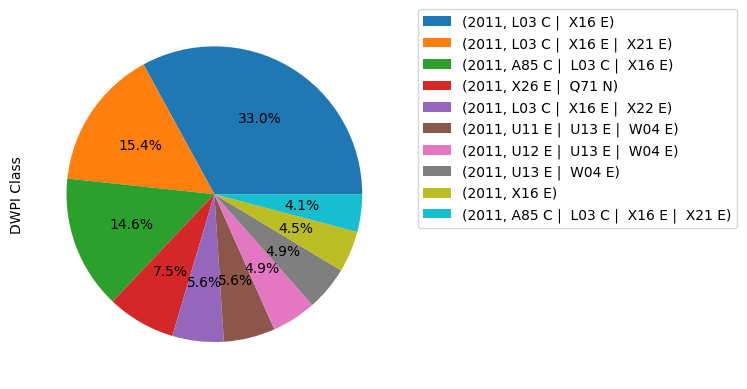

                                                   DWPI Class
Publication Year DWPI Class                                  
2012             L03 C |  X16 E                           112
                 L03 C |  X16 E |  X21 E                   61
                 A85 C |  L03 C |  X16 E                   60
                 L03 C |  T01 E |  W01 E |  X16 E          25
                 L03 C |  X16 E |  X22 E                   25
                 L03 C |  V01 E |  X16 E                   21
                 A85 C |  L03 C |  X16 E |  X21 E          18
                 T01 E                                     17
                 U13 E |  W04 E                            17
                 L03 C |  X16 E |  X21 E |  X22 E          16


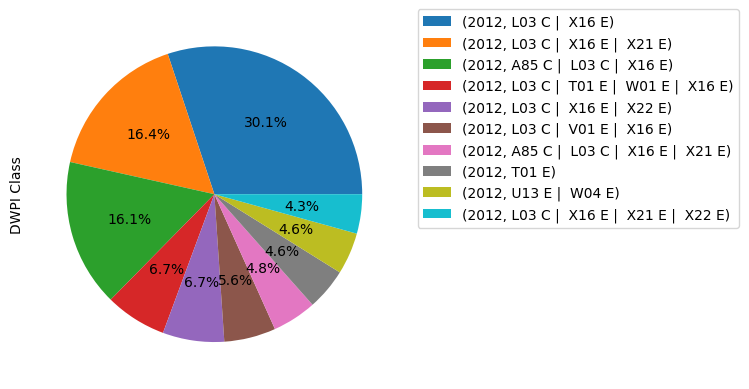

                                                   DWPI Class
Publication Year DWPI Class                                  
2013             L03 C |  X16 E                           125
                 L03 C |  X16 E |  X21 E                  100
                 A85 C |  L03 C |  X16 E                   54
                 L03 C |  X16 E |  X22 E                   33
                 L03 C |  T01 E |  W01 E |  X16 E          28
                 A85 C |  L03 C |  X16 E |  X21 E          23
                 L03 C |  X16 E |  X21 E |  X22 E          20
                 U13 E |  W04 E                            18
                 T01 E |  U14 E                            17
                 A85 C |  L03 C |  X16 E |  X22 E          15


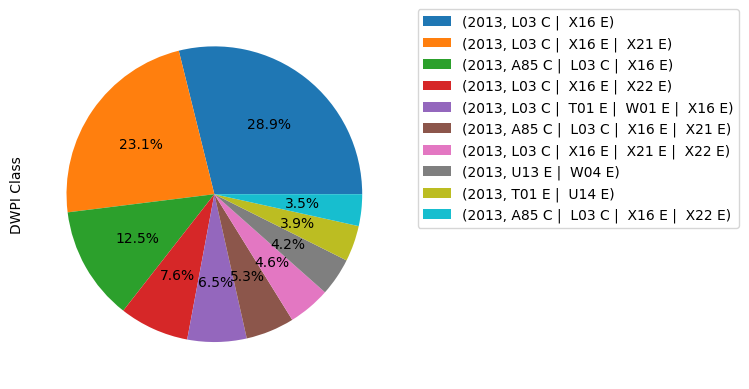

                                                   DWPI Class
Publication Year DWPI Class                                  
2014             L03 C |  X16 E                           146
                 L03 C |  X16 E |  X21 E                   80
                 A85 C |  L03 C |  X16 E                   76
                 T01 E                                     26
                 L03 C |  X16 E |  X22 E                   23
                 A85 C |  L03 C |  X16 E |  X21 E          22
                 L03 C |  X16 E |  X21 E |  X22 E          20
                 T01 E |  U14 E                            19
                 U13 E |  W04 E                            19
                 X26 E |  Q71 N                            19


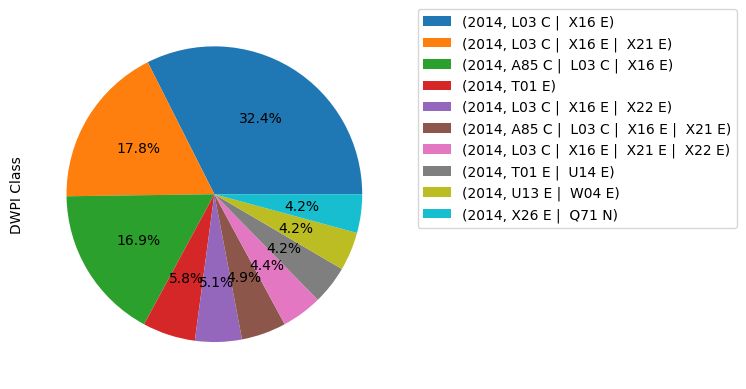

                                                            DWPI Class
Publication Year DWPI Class                                           
2015             L03 C |  X16 E                                    156
                 A85 C |  L03 C |  X16 E                            83
                 L03 C |  X16 E |  X21 E                            76
                 A85 C |  L03 C |  X16 E |  X21 E                   32
                 L03 C |  X16 E |  X21 E |  X22 E                   19
                 T01 E                                              18
                 U13 E |  W04 E                                     18
                 L03 C |  X16 E |  X22 E                            15
                 T01 E |  U14 E                                     14
                 L03 C |  T01 E |  W01 E |  X16 E |  X21 E          12


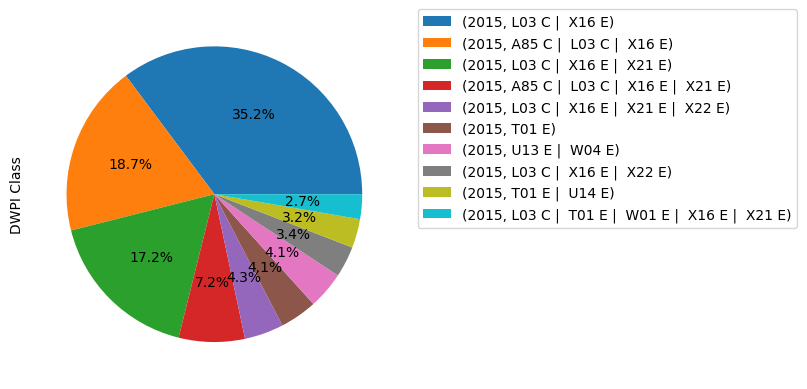

                                                   DWPI Class
Publication Year DWPI Class                                  
2016             L03 C |  X16 E                           135
                 A85 C |  L03 C |  X16 E                   76
                 L03 C |  X16 E |  X21 E                   50
                 A85 C |  L03 C |  X16 E |  X21 E          37
                 X16 E                                     24
                 T01 E                                     22
                 U12 E |  U13 E |  W04 E                   19
                 U13 E |  W04 E                            18
                 W04 E                                     16
                 X26 E |  Q71 N                            15


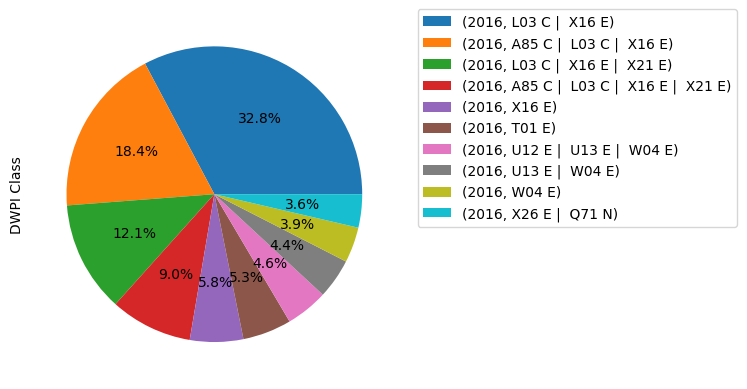

                                                   DWPI Class
Publication Year DWPI Class                                  
2017             L03 C |  X16 E                           162
                 A85 C |  L03 C |  X16 E                  105
                 L03 C |  X16 E |  X21 E                   59
                 U13 E |  W04 E                            43
                 A85 C |  L03 C |  X16 E |  X21 E          31
                 T01 E                                     25
                 T01 E |  U14 E                            17
                 W04 E                                     16
                 E34 C |  L03 C |  X16 E                   15
                 U11 E |  U13 E |  W04 E                   13


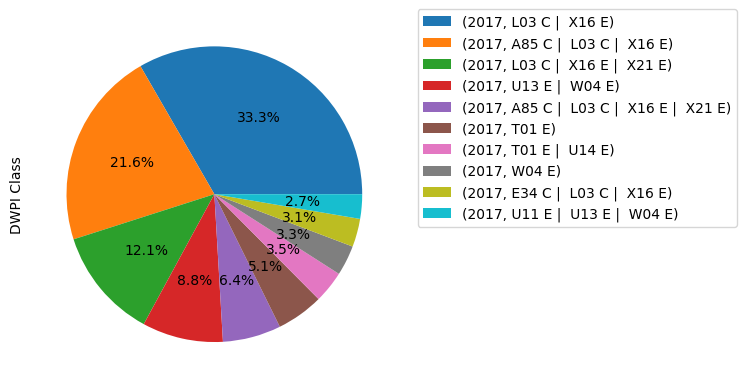

                                                   DWPI Class
Publication Year DWPI Class                                  
2018             L03 C |  X16 E                           198
                 A85 C |  L03 C |  X16 E                  100
                 L03 C |  X16 E |  X21 E                   70
                 U13 E |  W04 E                            35
                 X16 E                                     26
                 A85 C |  L03 C |  X16 E |  X21 E          24
                 T01 E                                     19
                 W04 E                                     19
                 E34 C |  L03 C |  X16 E                   14
                 T01 E |  U14 E                            11


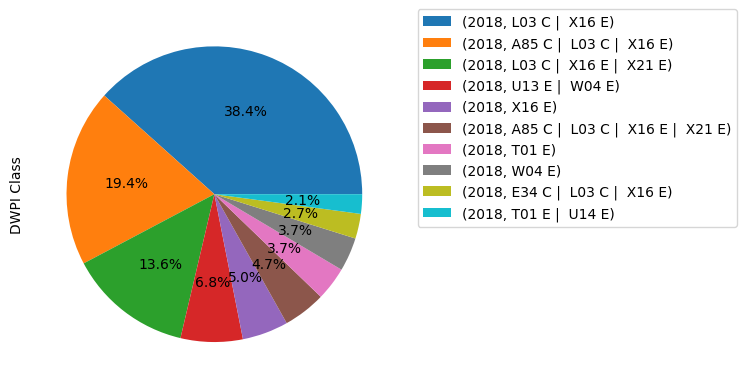

                                                   DWPI Class
Publication Year DWPI Class                                  
2019             L03 C |  X16 E                           207
                 A85 C |  L03 C |  X16 E                  122
                 L03 C |  X16 E |  X21 E                   72
                 U13 E |  W04 E                            41
                 A85 C |  L03 C |  X16 E |  X21 E          39
                 T01 E                                     34
                 L03 C |  T01 E |  X16 E                   20
                 X16 E                                     19
                 L03 C |  X12 E |  X16 E                   12
                 T01 E |  U14 E                            12


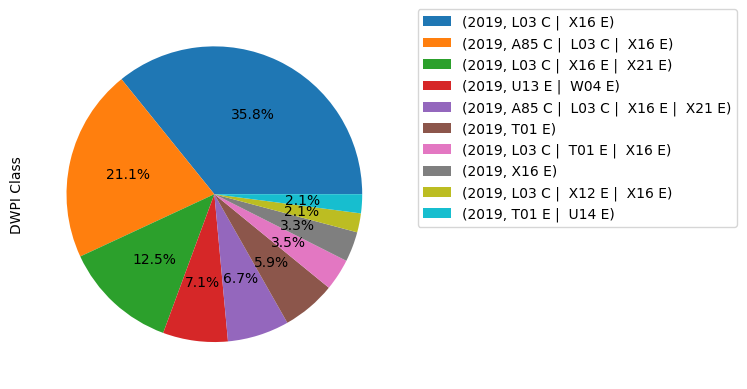

                                                   DWPI Class
Publication Year DWPI Class                                  
2020             L03 C |  X16 E                           235
                 A85 C |  L03 C |  X16 E                  115
                 L03 C |  X16 E |  X21 E                   58
                 A85 C |  L03 C |  X16 E |  X21 E          39
                 T01 E                                     32
                 W04 E                                     27
                 U13 E |  W04 E                            26
                 X16 E                                     22
                 E34 C |  L03 C |  X16 E                   14
                 E31 C |  L03 C |  X16 E                   13


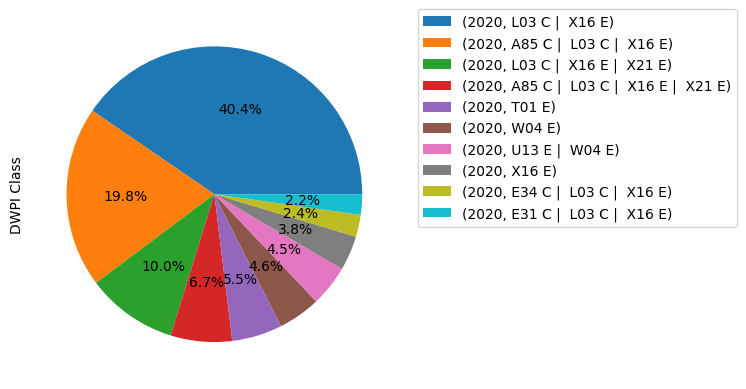

                                                   DWPI Class
Publication Year DWPI Class                                  
2021             L03 C |  X16 E                           311
                 A85 C |  L03 C |  X16 E                  148
                 L03 C |  X16 E |  X21 E                   66
                 A85 C |  L03 C |  X16 E |  X21 E          40
                 T01 E                                     33
                 U13 E |  W04 E                            27
                 L03 C |  X12 E |  X16 E                   21
                 W04 E                                     21
                 T01 E |  U14 E                            17
                 X16 E                                     16


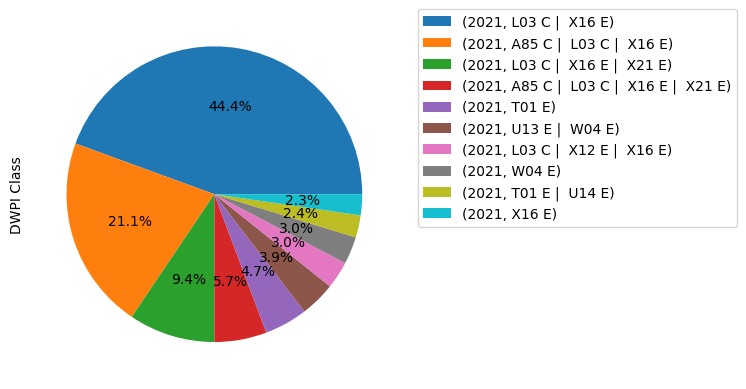

                                                   DWPI Class
Publication Year DWPI Class                                  
2022             L03 C |  X16 E                           326
                 A85 C |  L03 C |  X16 E                  154
                 L03 C |  X16 E |  X21 E                   77
                 A85 C |  L03 C |  X16 E |  X21 E          42
                 X16 E                                     36
                 E31 C |  L03 C |  X16 E                   27
                 T01 E                                     23
                 U13 E |  W04 E                            22
                 W04 E                                     22
                 X16 E |  X21 E                            20


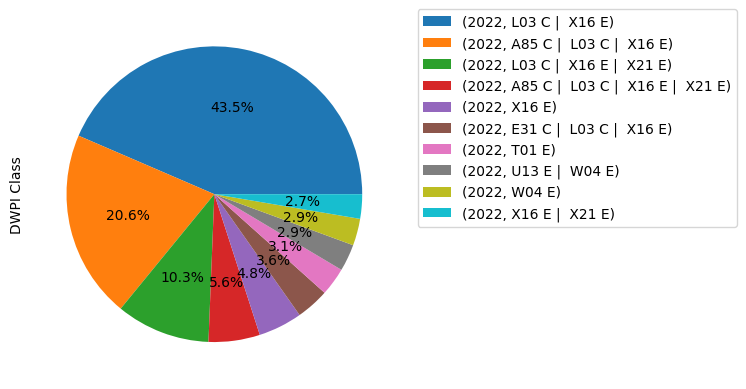

                                                   DWPI Class
Publication Year DWPI Class                                  
2023             L03 C |  X16 E                            62
                 A85 C |  L03 C |  X16 E                   35
                 L03 C |  X16 E |  X21 E                   20
                 T01 E                                     11
                 A85 C |  L03 C |  X16 E |  X21 E          10
                 E31 C |  L03 C |  X16 E                    8
                 X16 E                                      6
                 E34 C |  L03 C |  X16 E                    4
                 E13 C |  L03 C |  X16 E                    3
                 L03 C |  W01 E |  X16 E                    3


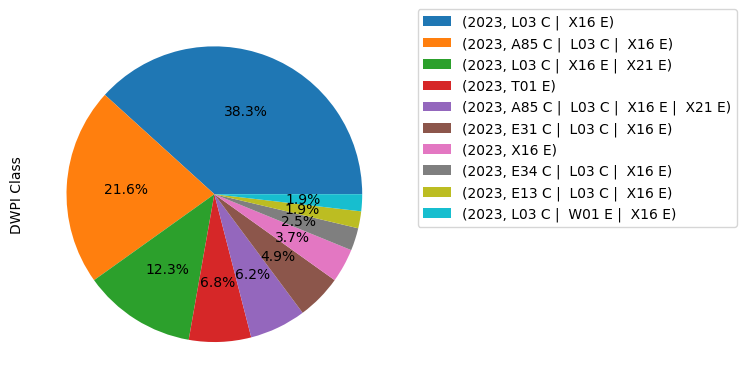

In [13]:
### GRAFICO A TORTA -CICLO FOR ANNUALE PER CLASSE TECNOLOGICA BREVETTI
for i in range(2010,2024):          #ciclo per produrre pie e numero di brevetti suddivisi per tipologia effettuati anno per anno
    print(df.loc[[i]])
    df.loc[[i]].plot(kind="pie", subplots= True, legend= True,autopct='%.1f%%',labeldistance=None )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

MIGLIORI IMPRESE DI SETTORE CON PIU' BREVETTI PER TUTTI GLI ANNI

In [14]:
enterprises = data['Ultimate Parent'].value_counts()
print(enterprises[0:21])

SONY CORP                                                               1269
PANASONIC HOLDING CORPORATION                                            890
FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI FILM HOLDINGS CORP)      666
BOSCH (ROBERT) GMBH                                                      377
HITACHI LTD                                                              369
TOYOTA MOTOR CORP                                                        342
MURATA MANUFACTURING CO. LTD.                                            333
SHOWA DENKO K.K.                                                         288
NEC CORP                                                                 285
LG CHEM LTD.                                                             270
TDK CORPORATION                                                          203
CONTEMPORARY AMPEREX TECHNOLOGY LTD                                      182
HUAWEI TECHNOLOGIES COMPANY LTD. (OWNED BY HUAWEI INVESTMENT/HOLDING     163

CONTEGGIO PER ANNO:

In [15]:
conteggio_per_anno = data.groupby(["Publication Year", 'Ultimate Parent'])['Ultimate Parent'].count()
top_10_per_anno = conteggio_per_anno.groupby("Publication Year").nlargest(10).reset_index(level=0, drop=True)
print(top_10_per_anno)

Publication Year  Ultimate Parent                                                    
2010              PANASONIC HOLDING CORPORATION                                          73
                  TOYOTA MOTOR CORP                                                      37
                  HAMAMATSU PHOTONICS KK                                                 19
                  DAIMLER AG                                                             17
                  BOSCH (ROBERT) GMBH                                                    16
                                                                                         ..
2023              SVOLT ENERGY TECHNOLOGY CO LTD                                          8
                  BASF SE                                                                 7
                  MURATA MANUFACTURING CO. LTD.                                           7
                  FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI FILM HOLDINGS CORP) 

                                                           Ultimate Parent
Publication Year Ultimate Parent                                          
2010             PANASONIC HOLDING CORPORATION                          73
                 TOYOTA MOTOR CORP                                      37
                 HAMAMATSU PHOTONICS KK                                 19
                 DAIMLER AG                                             17
                 BOSCH (ROBERT) GMBH                                    16
                 MICRON TECHNOLOGY INC.                                 16
                 BYD CO LTD                                             13
                 SONY CORP                                              10
                 ENEOS GROUP (FORMERLY JXTG HOLDINGS INC)                9
                 ZEON CORP.                                              9


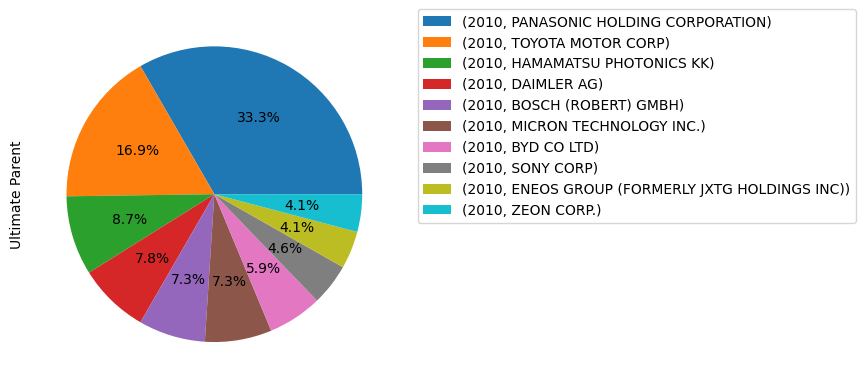

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2011             PANASONIC HOLDING CORPORATION                                   107
                 TOYOTA MOTOR CORP                                                51
                 BOSCH (ROBERT) GMBH                                              34
                 WOLFSPEED INC. (FORMERLY CREE INC.)                              34
                 DAIMLER AG                                                       33
                 ENEOS GROUP (FORMERLY JXTG HOLDINGS INC)                         24
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               23
                 KONINKLIJKE PHILIPS N.V.                                         15
                 CANON INC                                                        13
                 HITACHI LTD                                     

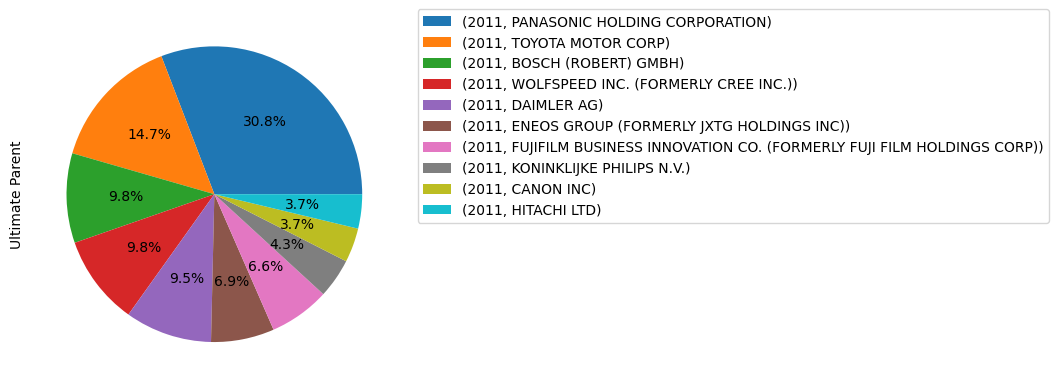

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2012             PANASONIC HOLDING CORPORATION                                   105
                 BOSCH (ROBERT) GMBH                                              69
                 TOYOTA MOTOR CORP                                                60
                 HITACHI LTD                                                      37
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               34
                 WOLFSPEED INC. (FORMERLY CREE INC.)                              26
                 SHOWA DENKO K.K.                                                 23
                 ENEOS GROUP (FORMERLY JXTG HOLDINGS INC)                         21
                 KONINKLIJKE PHILIPS N.V.                                         18
                 CANON INC                                       

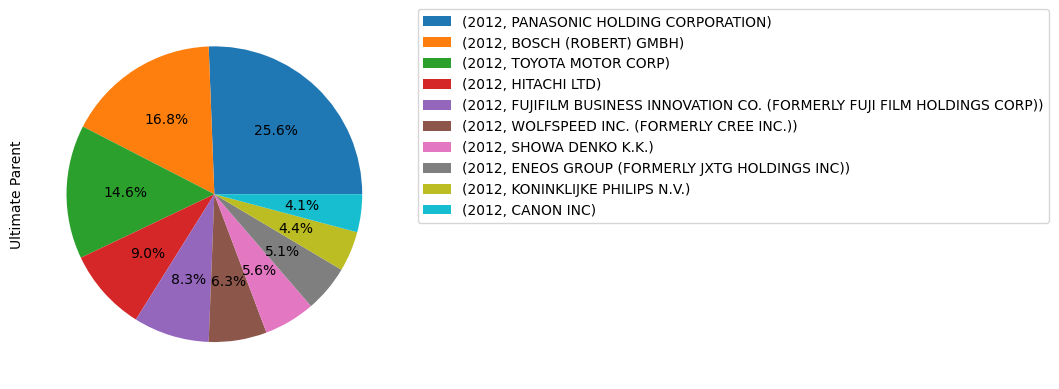

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2013             PANASONIC HOLDING CORPORATION                                    69
                 TOYOTA MOTOR CORP                                                62
                 HITACHI LTD                                                      49
                 NEC CORP                                                         48
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               47
                 SONY CORP                                                        41
                 BOSCH (ROBERT) GMBH                                              38
                 WOLFSPEED INC. (FORMERLY CREE INC.)                              32
                 BOSCH (ROBERT) GMBH | SAMSUNG SDI CO LTD                         31
                 MURATA MANUFACTURING CO. LTD.                   

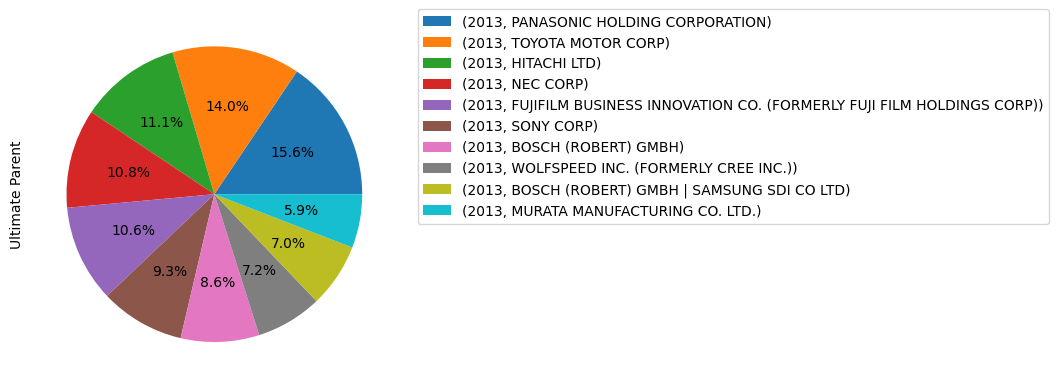

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2014             HITACHI LTD                                                      78
                 PANASONIC HOLDING CORPORATION                                    61
                 TOYOTA MOTOR CORP                                                44
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               42
                 SONY CORP                                                        39
                 BOSCH (ROBERT) GMBH                                              36
                 NEC CORP                                                         31
                 TOYOTA INDUSTRIES CORPORATION                                    27
                 ZEON CORP.                                                       27
                 LG CHEM LTD.                                    

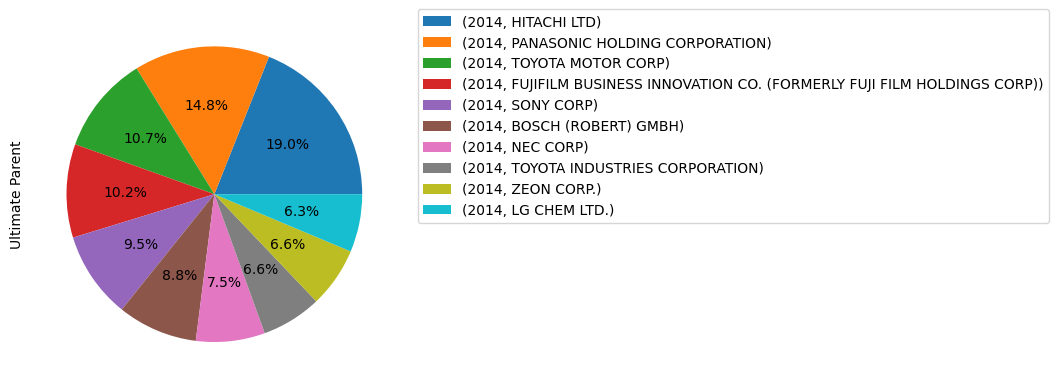

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2015             HITACHI LTD                                                      82
                 SONY CORP                                                        68
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               67
                 BOSCH (ROBERT) GMBH                                              49
                 TOYOTA MOTOR CORP                                                33
                 NEC CORP                                                         30
                 OLYMPUS CORP.                                                    27
                 PANASONIC HOLDING CORPORATION                                    25
                 SHOWA DENKO K.K.                                                 23
                 TSINGHUA UNIVERSITY | JIANGSU HUANDONG INST LI-.

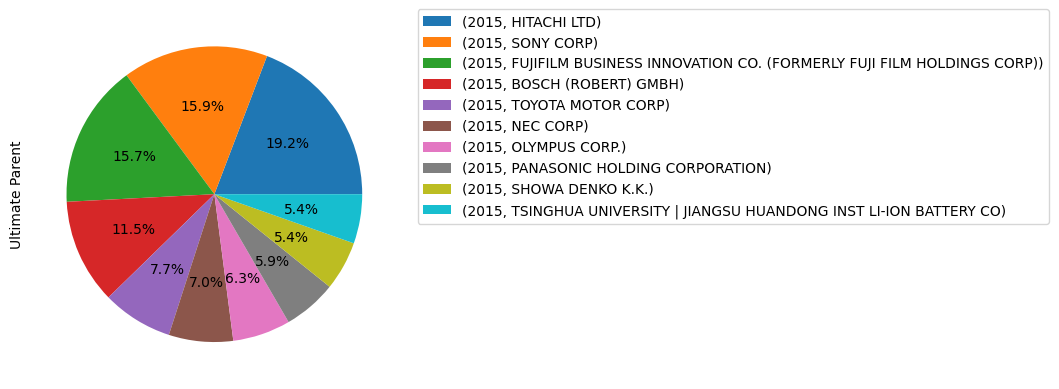

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2016             SONY CORP                                                       122
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               59
                 NEC CORP                                                         46
                 BOSCH (ROBERT) GMBH                                              35
                 JOHNSON CONTROLS INTERNATIONAL                                   29
                 HITACHI LTD                                                      27
                 SHOWA DENKO K.K.                                                 24
                 TSINGHUA UNIVERSITY | JIANGSU HUANDONG INST LI-...               22
                 PANASONIC HOLDING CORPORATION                                    16
                 TOYOTA INDUSTRIES CORPORATION                   

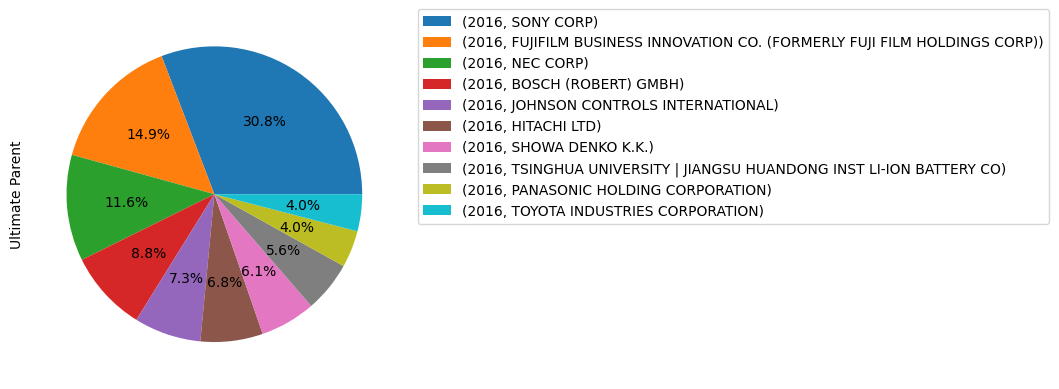

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2017             SONY CORP                                                       132
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               66
                 NEC CORP                                                         33
                 HITACHI LTD                                                      28
                 BOSCH (ROBERT) GMBH                                              27
                 PANASONIC HOLDING CORPORATION                                    24
                 GS YUASA CORPORATION                                             19
                 HUAWEI TECHNOLOGIES COMPANY LTD. (OWNED BY HUAW...               19
                 SIGNIFY NV                                                       18
                 INTEL CORPORATION                               

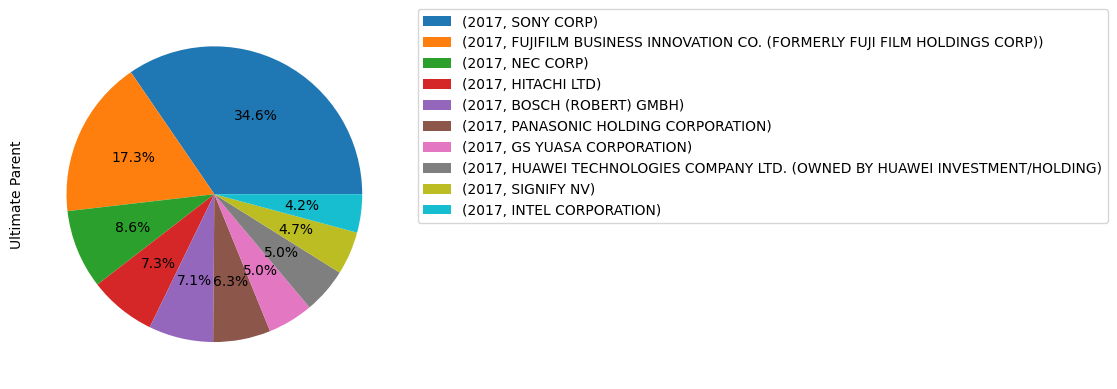

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2018             SONY CORP                                                       130
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               58
                 MURATA MANUFACTURING CO. LTD.                                    46
                 NEC CORP                                                         37
                 LG CHEM LTD.                                                     33
                 PANASONIC HOLDING CORPORATION                                    32
                 TDK CORPORATION                                                  27
                 SHOWA DENKO K.K.                                                 26
                 BOSCH (ROBERT) GMBH                                              22
                 HITACHI LTD                                     

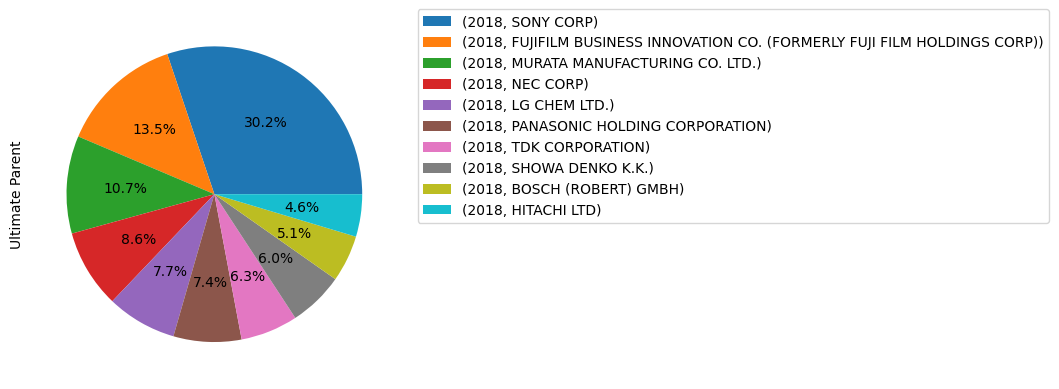

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2019             SONY CORP                                                       143
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               74
                 PANASONIC HOLDING CORPORATION                                    70
                 MURATA MANUFACTURING CO. LTD.                                    37
                 BOSCH (ROBERT) GMBH                                              32
                 SHOWA DENKO K.K.                                                 31
                 LG CHEM LTD.                                                     29
                 NEC CORP                                                         25
                 DAIKIN INDUSTRIES LTD                                            22
                 GS YUASA CORPORATION                            

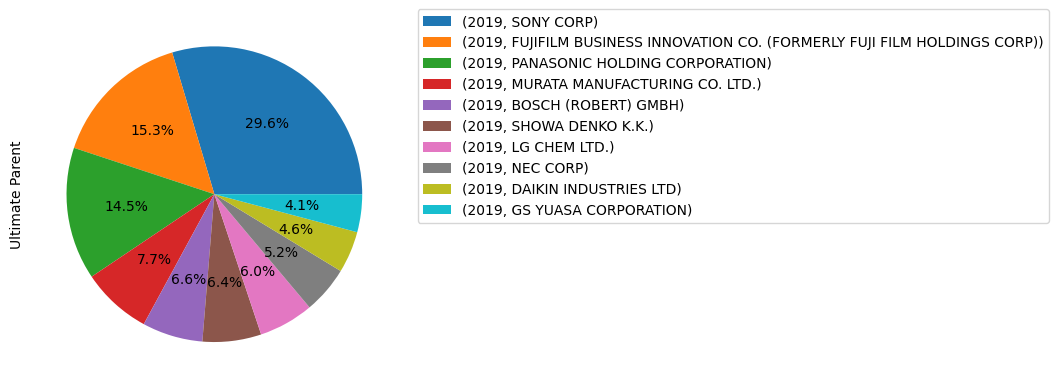

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2020             SONY CORP                                                       198
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               68
                 PANASONIC HOLDING CORPORATION                                    67
                 CONTEMPORARY AMPEREX TECHNOLOGY LTD                              49
                 LG CHEM LTD.                                                     43
                 SHOWA DENKO K.K.                                                 30
                 SUMITOMO METAL MINING CO. LTD.                                   30
                 MURATA MANUFACTURING CO. LTD.                                    28
                 SEKISUI CHEMICAL CO. LTD.                                        19
                 TDK CORPORATION                                 

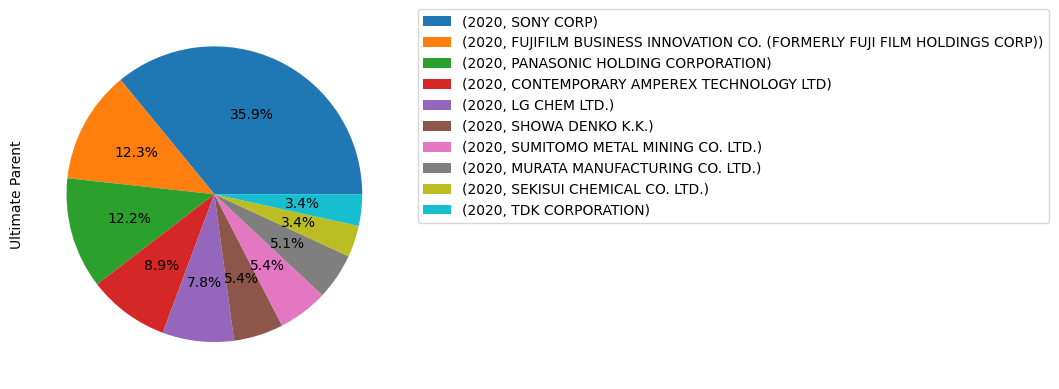

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2021             SONY CORP                                                       166
                 PANASONIC HOLDING CORPORATION                                   119
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               77
                 MURATA MANUFACTURING CO. LTD.                                    68
                 TDK CORPORATION                                                  54
                 CONTEMPORARY AMPEREX TECHNOLOGY LTD                              39
                 SHOWA DENKO K.K.                                                 30
                 LG CHEM LTD.                                                     25
                 GS YUASA CORPORATION                                             22
                 TEVA PHARMACEUTICAL INDUSTRIES LTD.             

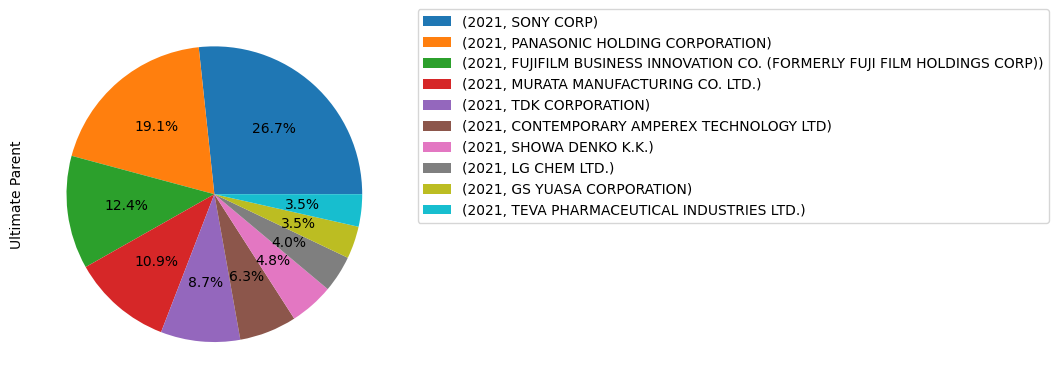

                                                                     Ultimate Parent
Publication Year Ultimate Parent                                                    
2022             SONY CORP                                                       175
                 PANASONIC HOLDING CORPORATION                                    95
                 MURATA MANUFACTURING CO. LTD.                                    58
                 TDK CORPORATION                                                  58
                 CONTEMPORARY AMPEREX TECHNOLOGY LTD                              50
                 FUJIFILM BUSINESS INNOVATION CO. (FORMERLY FUJI...               40
                 LG CHEM LTD.                                                     39
                 ZHUHAI COSMX BATTERY CO LTD                                      35
                 SHOWA DENKO K.K.                                                 30
                 APB CORP                                        

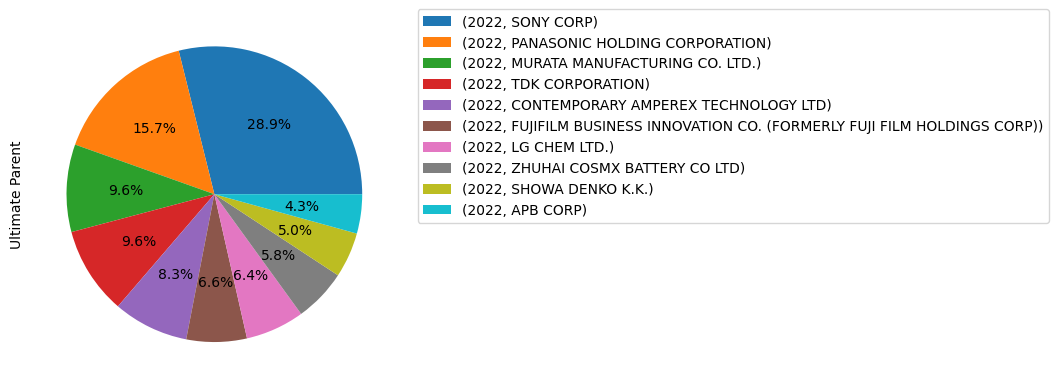

In [16]:
df = pd.DataFrame(top_10_per_anno)  # trasformazione in data frame
df = df.drop(2023, errors = 'ignore')

for i in range(2010,2023):          #ciclo per produrre piechar e numero di brevetti suddivisi per tipologia effettuati anno per anno
    print(df.loc[[i]])
    df.loc[[i]].plot(kind="pie", subplots=True, legend=False, autopct='%.1f%%', labeldistance=None )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

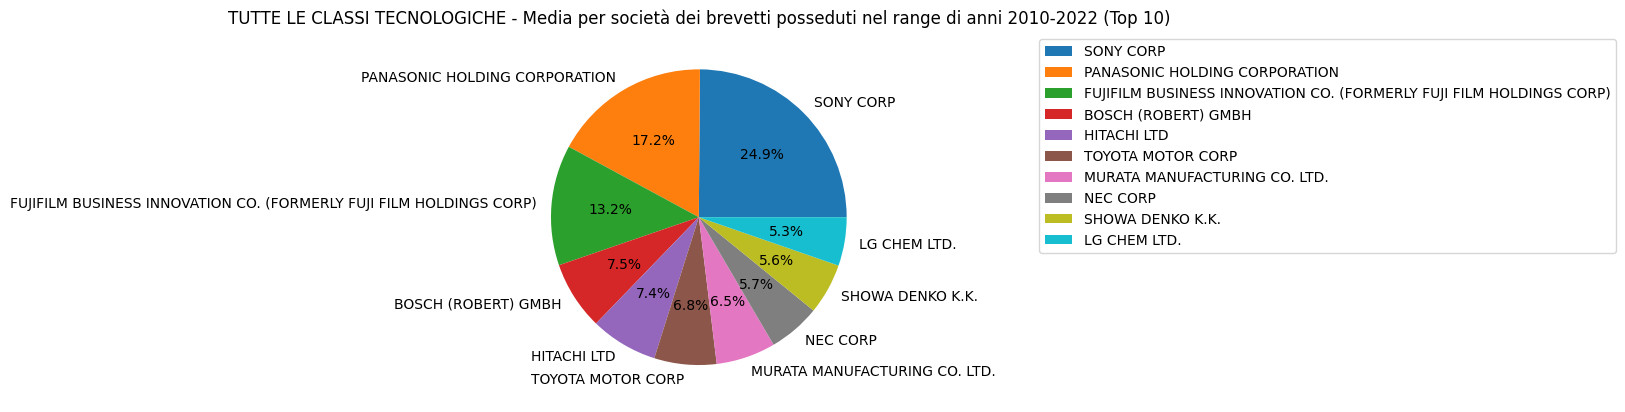

In [17]:
conteggio_per_anno = data.groupby(["Publication Year", 'Ultimate Parent'])['Ultimate Parent'].count()

# Trasforma la Series 'conteggio_per_anno' in un DataFrame e resetta l'indice
df = conteggio_per_anno.reset_index(name='conteggio')

# Filtra il DataFrame per includere solo gli anni tra il 2010 e il 2022
df_filtered = df[df["Publication Year"].between(2010, 2022)]

# Calcola il totale dei brevetti per società nel range di anni indicato
totali_per_societa = df_filtered.groupby("Ultimate Parent")["conteggio"].sum()

# Ordina le società per il totale dei brevetti e seleziona le prime 5
top_10_societa = totali_per_societa.sort_values(ascending=False).head(10)

# Calcola la media dei brevetti per società nel range di anni indicato
anni = len(df_filtered["Publication Year"].unique())
media_per_societa = top_10_societa / anni

# Genera il grafico a torta con la media per ogni società dei brevetti posseduti nel range di anni indicato
media_per_societa.plot(kind="pie", legend=False, autopct='%.1f%%')
plt.title("TUTTE LE CLASSI TECNOLOGICHE - Media per società dei brevetti posseduti nel range di anni 2010-2022 (Top 10)")
plt.ylabel('')  # Rimuovi l'etichetta dell'asse y
plt.legend(loc='upper right', bbox_to_anchor=(3, 1))
plt.show()

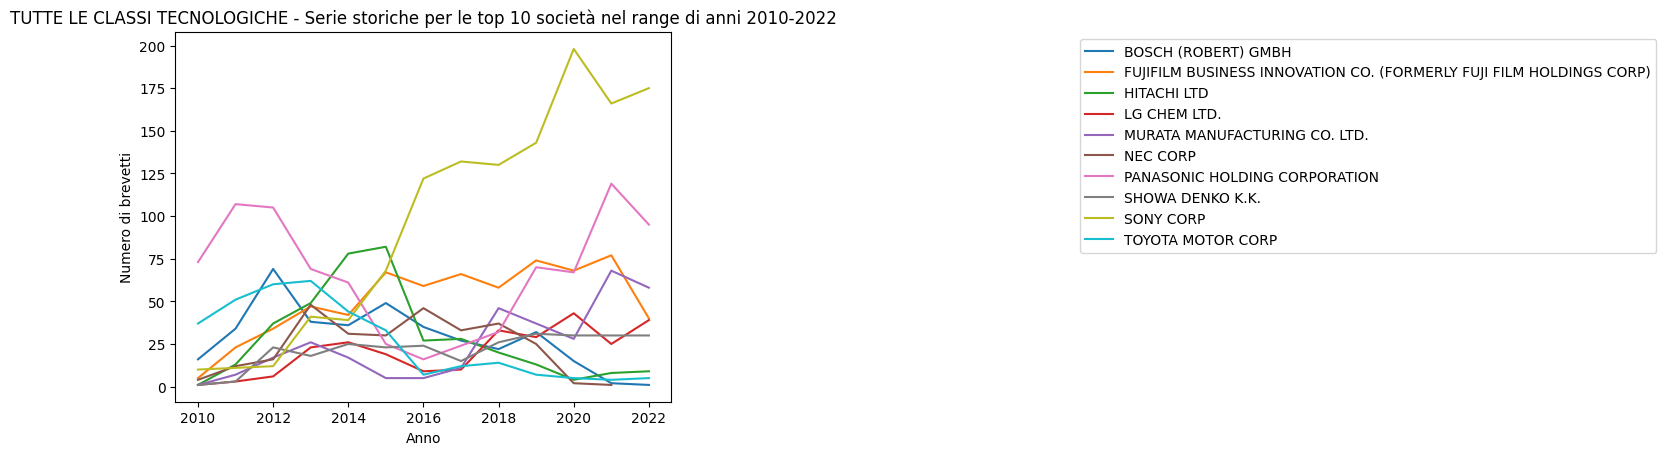

In [18]:
# calcola il conteggio dei brevetti per ogni anno e società
conteggio_per_anno = data.groupby(["Publication Year", 'Ultimate Parent'])['Ultimate Parent'].count()

# trasforma la Series in un DataFrame e resetta l'indice
df = conteggio_per_anno.reset_index(name='conteggio')

# filtra il DataFrame per includere solo gli anni tra il 2010 e il 2022
df_filtered = df[df["Publication Year"].between(2010, 2022)]

# calcola il totale dei brevetti per società nel range di anni indicato
totali_per_societa = df_filtered.groupby("Ultimate Parent")["conteggio"].sum()

# ordina le società per il totale dei brevetti e seleziona le prime 5
top_10_societa = totali_per_societa.sort_values(ascending=False).head(10)

# crea una tabella pivot per avere le società come colonne
pivot_filtered = df_filtered[df_filtered['Ultimate Parent'].isin(top_10_societa.index)].pivot(index='Publication Year', columns='Ultimate Parent', values='conteggio')

# genera il grafico di serie storica per le top 5 società
pivot_filtered.plot()
plt.title("TUTTE LE CLASSI TECNOLOGICHE - Serie storiche per le top 10 società nel range di anni 2010-2022")
plt.ylabel('Numero di brevetti')
plt.xlabel('Anno')
plt.legend(loc='upper right', bbox_to_anchor=(3, 1))
plt.show()

In [19]:
def ends_with_x21e(s):
    if isinstance(s, str):
        return bool(re.search(r'\bX21 E\b$', s))
    return False

# Filtra il DataFrame per includere solo le classi DWPI che terminano con "X21 E"
data_x21 = data[data["DWPI Class"].apply(ends_with_x21e)]

# Stampa il DataFrame filtrato
print(data_x21)

       Unnamed: 0 Publication Number  \
43             43     WO2023031527A1   
46             46     WO2023031227A1   
52             52     WO2023030026A1   
54             54     WO2023030024A1   
58             58     WO2023029573A1   
...           ...                ...   
18435       18435     WO2009128879A3   
18438       18438     WO2010016568A1   
18439       18439     WO2010016567A1   
18479       18479     WO2010005052A2   
18484       18484     WO2010003069A1   

                                            Title - DWPI  \
43     Method for extending duration of use of  lithi...   
46     Preparation of silicon-carbon composite materi...   
52     New lithium-germanium-phosphorus-sulfide type ...   
54     Electrochemical model based method for estimat...   
58     Extracting lithium from waste lithium battery ...   
...                                                  ...   
18435   Lithium ion secondary battery useful e.g. in ...   
18438  Binder for electrode of  lithium

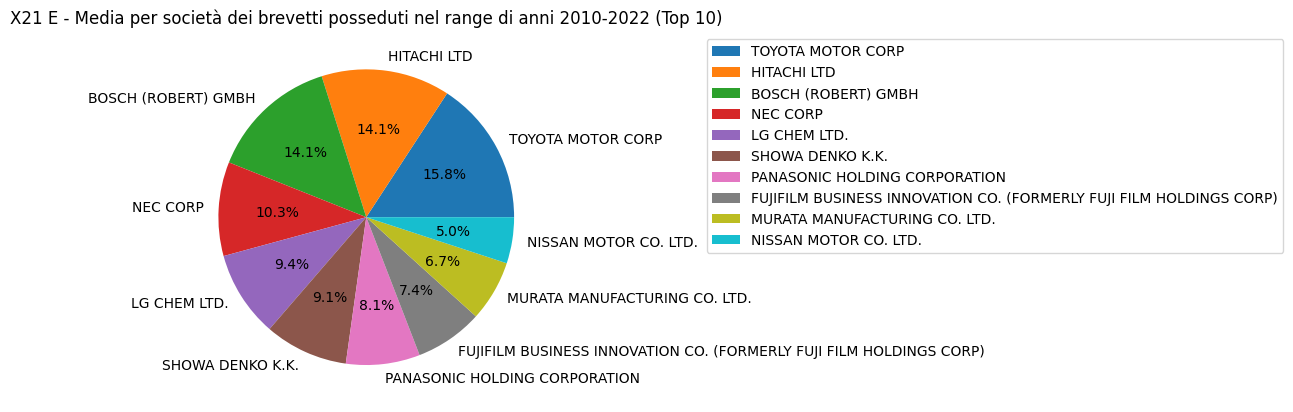

In [20]:
conteggio_per_anno_x21 = data_x21.groupby(["Publication Year", 'Ultimate Parent'])['Ultimate Parent'].count()

# Trasforma la Series 'conteggio_per_anno' in un DataFrame e resetta l'indice
df_x21 = conteggio_per_anno_x21.reset_index(name='conteggio')

# Filtra il DataFrame per includere solo gli anni tra il 2010 e il 2022
df_filtered_x21 = df_x21[df_x21["Publication Year"].between(2010, 2022)]

# Calcola il totale dei brevetti per società nel range di anni indicato
totali_per_societa_x21 = df_filtered_x21.groupby("Ultimate Parent")["conteggio"].sum()

# Ordina le società per il totale dei brevetti e seleziona le prime 5
top_10_societa_x21 = totali_per_societa_x21.sort_values(ascending=False).head(10)

# Calcola la media dei brevetti per società nel range di anni indicato
anni_x21 = len(df_filtered_x21["Publication Year"].unique())
media_per_societa_x21 = top_10_societa_x21 / anni_x21

# Genera il grafico a torta con la media per ogni società dei brevetti posseduti nel range di anni indicato
media_per_societa_x21.plot(kind="pie", legend=False, autopct='%.1f%%')
plt.title("X21 E - Media per società dei brevetti posseduti nel range di anni 2010-2022 (Top 10)")
plt.ylabel('')  # Rimuovi l'etichetta dell'asse y
plt.legend(loc='upper right', bbox_to_anchor=(3, 1))
plt.show()

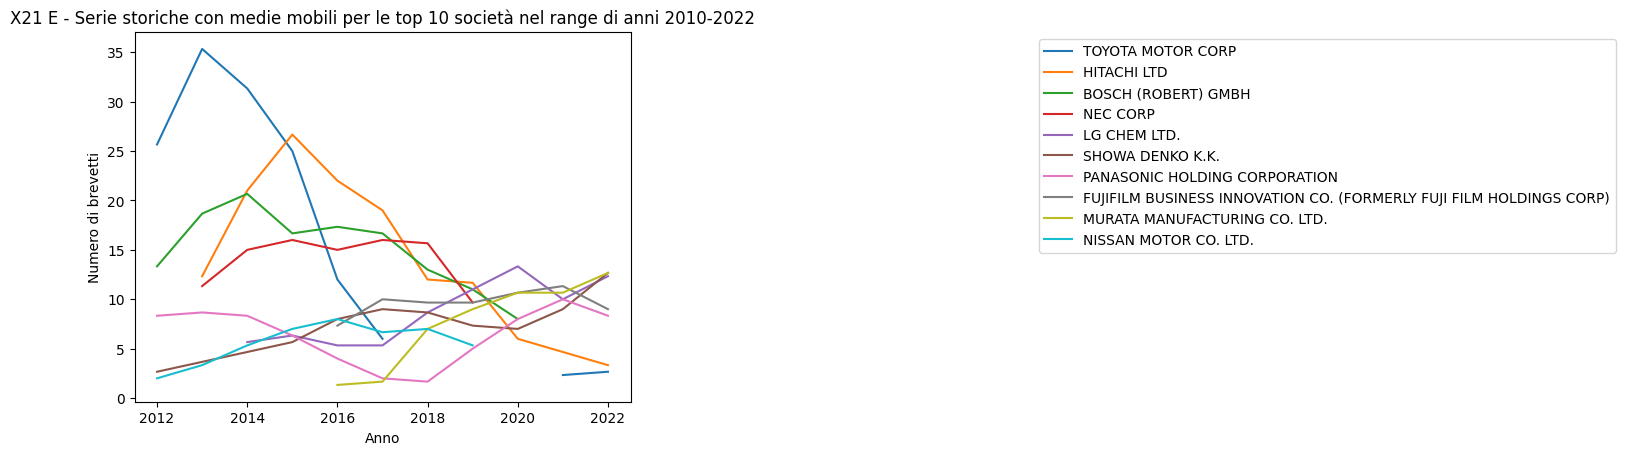

In [21]:
# Crea una tabella pivot per avere le società come colonne
pivot_x21 = df_filtered_x21.pivot(index='Publication Year', columns='Ultimate Parent', values='conteggio')

# Filtra la tabella pivot per includere solo le top 10 società
top_10_societa_x21 = pivot_x21.sum().sort_values(ascending=False).head(10)
societa_selezionate_x21 = pivot_x21[top_10_societa_x21.index]

# Calcola le medie mobili su finestre temporali di 3 anni per le top 10 società
media_mobili_x21 = societa_selezionate_x21.rolling(window=3).mean()

# Genera il grafico di serie storiche con medie mobili per le top 10 società
media_mobili_x21.plot()
plt.title("X21 E - Serie storiche con medie mobili per le top 10 società nel range di anni 2010-2022")
plt.ylabel('Numero di brevetti')
plt.xlabel('Anno')
plt.legend(loc='upper right', bbox_to_anchor=(3, 1))
plt.show()

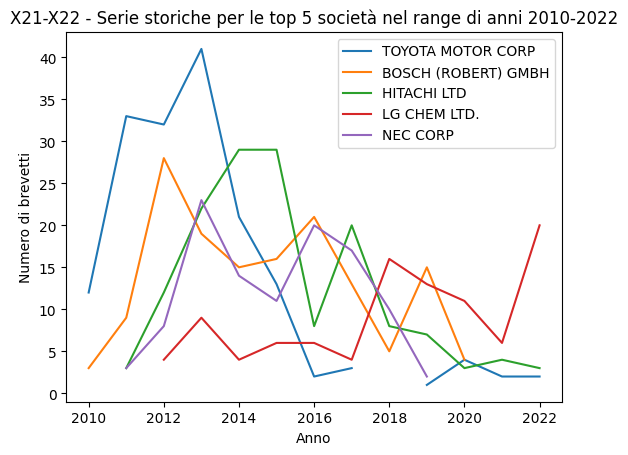

In [22]:
#isoliamo solo i brevetti che hanno come classi tecnologiche o x21 o x22
cl_x22_x21 = data[data["DWPI Class"].str.contains('|'.join(['X21', 'X22']), case= False, na=False)]

conteggio_per_anno_x21_x22 = cl_x22_x21.groupby(["Publication Year", 'Ultimate Parent'])['Ultimate Parent'].count()

# Trasforma la Series 'conteggio_per_anno' in un DataFrame e resetta l'indice
df_x21_x22 = conteggio_per_anno_x21_x22.reset_index(name='conteggio')


pivot_x21_x22 = df_x21_x22.pivot(index='Publication Year', columns='Ultimate Parent', values='conteggio')
top_10_societa_x21_x22 = pivot_x21_x22.sum().sort_values(ascending=False).head()
societa_selezionate_x21_x22 = pivot_x21[top_10_societa_x21_x22.index]

# genera il grafico di serie storica per le top 5 società
societa_selezionate_x21_x22.plot()
plt.title("X21-X22 - Serie storiche per le top 5 società nel range di anni 2010-2022")
plt.ylabel('Numero di brevetti')
plt.xlabel('Anno')
plt.legend(loc='upper right')
plt.show()


Publication Year
2010    169
2011    228
2012    344
2013    492
2014    399
2015    378
2016    257
2017    201
2018    216
2019    272
2020    280
2021    315
2022    385
Name: DWPI Class, dtype: int64


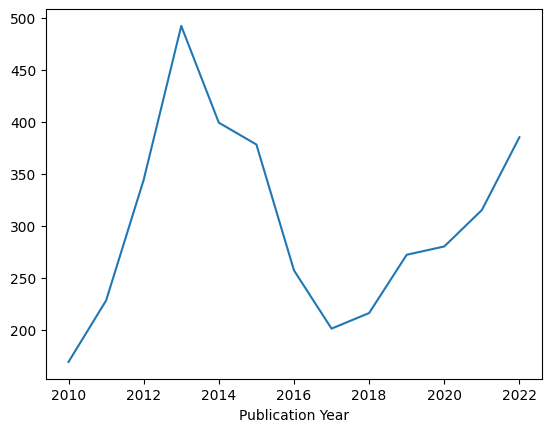

In [23]:
ragg_anno_x22_x21 = cl_x22_x21.groupby(data["Publication Year"])["DWPI Class"].count()
ragg_anno_x22_x21 = ragg_anno_x22_x21.drop(2023, errors='ignore')  #eliminato anno 2023 date le poche osservazioni
print(ragg_anno_x22_x21)  # totali anno per anno
plt.clf()
ragg_anno_x22_x21.plot()
plt.show()